In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as math
data1 = pd.read_csv('File04.csv', sep= ',') #Fil 5 sportssensor 
data2 = pd.read_csv('File14.csv', sep= ',') #Fil 16 i den ene og måske 15 i den anden
data1.head(5)





,Unnamed: 0,Unnamed: 1,PatientZero:CentreOfMass,Unnamed: 3,Unnamed: 4,PatientZero:CentreOfMassFloor,Unnamed: 6,Unnamed: 7,PatientZero:LAbsAnkleAngle,Unnamed: 9,...,PatientZero:TRX,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254
0,Frame,Sub Frame,X,Y,Z,X,Y,Z,X,Y,...,RX,RY,RZ,TX,TY,TZ,SX,SY,SZ,NaN
1,NaN,NaN,mm,mm,mm,mm,mm,mm,deg,deg,...,deg,deg,deg,mm,mm,mm,mm,mm,mm,NaN
2,1,0,2590.27,282.063,948.421,2590.27,282.063,0,6.55469,0,...,2.38796,174.735,-0.0924824,2510.57,286.752,1439.58,201.374,201.374,201.374,NaN
3,2,0,2590.31,282.051,948.419,2590.31,282.051,0,6.55539,0,...,2.38189,174.737,-0.0900967,2510.63,286.72,1439.58,201.369,201.369,201.369,NaN
4,3,0,2590.34,282.039,948.416,2590.34,282.039,0,6.55606,0,...,2.37603,174.739,-0.087485,2510.68,286.688,1439.59,201.365,201.365,201.365,NaN


In [20]:
data1 = data1.fillna(0)
data1.drop(index=data1.index[:3], 
        axis=0, 
        inplace=True)
data1.columns = range(data1.shape[1])

data2 = data2.fillna(0)
data2.drop(index=data2.index[:3], 
        axis=0, 
        inplace=True)
data2.columns = range(data2.shape[1])

In [21]:
data1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
6,5,0,2590.39,282.016,948.412,2590.39,282.016,0,6.55759,0,...,2.36435,174.744,-0.081345,2510.79,286.624,1439.59,201.358,201.358,201.358,0.0
7,6,0,2590.42,282.005,948.41,2590.42,282.005,0,6.55834,0,...,2.35883,174.747,-0.0779426,2510.84,286.592,1439.59,201.356,201.356,201.356,0.0
8,7,0,2590.44,281.994,948.409,2590.44,281.994,0,6.55914,0,...,2.35332,174.749,-0.0741882,2510.88,286.561,1439.59,201.354,201.354,201.354,0.0
9,8,0,2590.47,281.983,948.408,2590.47,281.983,0,6.55984,0,...,2.34804,174.752,-0.0701813,2510.93,286.529,1439.59,201.352,201.352,201.352,0.0
10,9,0,2590.49,281.973,948.407,2590.49,281.973,0,6.56062,0,...,2.34286,174.755,-0.0659484,2510.98,286.498,1439.6,201.351,201.351,201.351,0.0


In [66]:
rightknee = data1[[194, 195, 196]] #GM
leftknee = data1[[71, 72, 73]] #BT
#rows only to 2576
rightknee.drop(rightknee.tail(2612).index,
        inplace = True)
leftknee.drop(leftknee.tail(2612).index,
        inplace = True)

leftknee.columns = ['X','Y','Z']
rightknee.columns = ['X','Y','Z']


rightknee2 = data2[[179, 180, 181]]
leftknee2 = data2[[65, 66, 67]]
#rows only to 2576
rightknee2.drop(rightknee2.tail(10922).index,
        inplace = True)
leftknee2.drop(leftknee2.tail(10922).index,
        inplace = True)

leftknee2.columns = ['X','Y','Z']
rightknee2.columns = ['X','Y','Z']

print(leftknee, rightknee)
print(leftknee2, rightknee2)


             X        Y         Z
6     -1.07815  2.26482  -3.09816
7     -1.07949  2.26403  -3.10058
8     -1.08054  2.26332  -3.10247
9     -1.08152  2.26268  -3.10423
10    -1.08228  2.26211  -3.10575
...        ...      ...       ...
2604   8.78952  2.42899   4.65172
2605   8.76917  2.44209   4.72426
2606    8.7501  2.45412   4.79309
2607   8.73225   2.4651   4.85823
2608   8.71561  2.47499   4.91965

[2603 rows x 3 columns]               X        Y         Z
6     -0.978551  4.09217      -1.9
7     -0.986968   4.0929  -1.91172
8     -0.993805  4.09335  -1.92243
9     -0.999079  4.09353  -1.93174
10     -1.00283  4.09346   -1.9399
...         ...      ...       ...
2604   -7.30062  4.50284  -5.20445
2605   -7.39309  4.54008  -5.24585
2606   -7.47456  4.58023  -5.26997
2607    -7.5449  4.62325    -5.277
2608    -7.6042  4.66915   -5.2668

[2603 rows x 3 columns]
               X        Y           Z
7         8.7536  1.32012     8.00069
8        8.89809  1.31779     7.98047
9       

/Users/madsbergholdtsorensen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [68]:

leftknee = pd.read_csv('PRO_leftknee.csv')
rightknee = pd.read_csv('PRO_rightknee.csv')
leftknee222 = pd.read_csv('PRO_leftknee2.csv')
rightknee222 = pd.read_csv('PRO_rightknee2.csv')

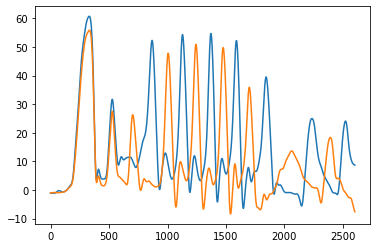

In [70]:
plt.plot(leftknee['X'])
plt.plot(rightknee['X'])

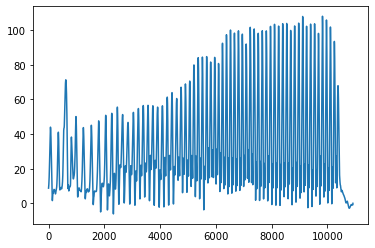

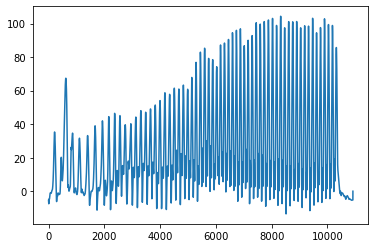

In [71]:
plt.plot(leftknee222['X'])
plt.show()

plt.plot(rightknee222['X'])
plt.show()


In [67]:
leftknee.to_csv('PRO_leftknee.csv')
rightknee.to_csv('PRO_rightknee.csv')
leftknee2.to_csv('PRO_leftknee2.csv')
rightknee2.to_csv('PRO_rightknee2.csv')